
# Project: Wrangling and Analyze Data

## Introduction


Data analytics is a life-long skill, that when harnessed can be useful in every areas of life. It makes life and daily living easier, eliminating repetitions and preventing unwarranted exercises. Over the years, it has been implemented in various sector to optimize and produce results for profitability and growth.

This project focuses on the use of data analytics skills, with major concentration on the pandas, to analyse a dataset obtained from twitter's space. The real purpose of the project is to apply all previous learnt wrangling and visualization skills on a real-world data to expose hidden insight and produce meaningful results.

The data was obtain from a twitter account, WeRateDogs which create room for users to rate several dog images, giving them a specific figure over 10. Three sets of data will be gathered from this WeRateDogs international space using various tactics. They include online programmatically download, local download, and  Twitter API.

 Downloading all libraries necessary

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitterA = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using OS method to check if folder exists and creating a new one if not
folder_name = 'image predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Defining the url and using the requests.get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Access the content and write to a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
#os.listdir(folder_name)

# Read downloaded file into a Dataframe
df_imageP = pd.read_csv('image-predictions.tsv', sep='\t')


3. Read the tweet_json.txt file line by line into a pandas DataFrame with  tweet ID, retweet count, and favorite count.

In [4]:
#Create an empty list for extract data
json_data =[]

#Open json text file
with open('tweet-json.txt', 'r') as file:
    #Iterate line by line
    for line in file:
    #load select line
        data_line = json.loads(line)
    #extract intended columns from line
        tweet_ID = data_line['id']
        retweet_count = data_line['retweet_count']
        favorite_count = data_line['favorite_count']
    #append extracted columns
        json_data.append({'tweet_id' :tweet_ID, 
                          'retweet_count' :retweet_count, 
                          'favorite_count' :favorite_count})
#create panda dataframe from list
json_df = pd.DataFrame(json_data, columns =['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### A. Accessing all dataset visually

In [5]:
df_twitterA

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_twitterA.source.sample()

2342    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

*QUALITY ISSUES*

1. Inconsistent data on the rating_denominator column
2. Missing and inconsistent records on the name column
3. Lots of null records on the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
4. Null values in columns doggo, pupper, puppo, and floofer represented with 'None' rather than 'NaN'
5. Some records in the expanded_url column has more than one url represented.
6. Many useful information combined within the text column.

*TIDINESS ISSUES*
1. Represent the dog stages columns (doggo, pupper, puppo, and floofer) properly.

In [7]:
df_imageP

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


*QUALITY ISSUES*

1. p1,p2, and p3 columns have the combination of upper and lower case letters.
2. Column names are not very explanatory.


In [8]:
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


*TIDINESS ISSUES*

1. All three dataset all belong to the same observational unit.

### B. Accessing all data programmatically

1. Twitter archive dataset

In [9]:
#list all columns in twitter archive dataset
df_twitterA.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
#access twitter achive dataset information 
df_twitterA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#checking for duplicate record in twitter achive dataset
sum(df_twitterA.duplicated())

0

In [12]:
#df_twitterA[df_twitterA['rating_denominator'] != 10].loc[2335,'text']

In [13]:
df_twitterA.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
df_twitterA.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
#accessing rating numerators column
df_twitterA.rating_numerator.value_counts().tail(5)

27     1
45     1
99     1
121    1
204    1
Name: rating_numerator, dtype: int64

In [16]:
df_twitterA[df_twitterA['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [17]:
#accessing rating denominators column
df_twitterA.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# accessing random sample
df_twitterA.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None


In [19]:
df_twitterA.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Buddy          7
Daisy          7
Toby           7
Bailey         7
Scout          6
Rusty          6
Jack           6
Dave           6
Jax            6
Milo           6
Leo            6
Stanley        6
Koda           6
Bella          6
Oscar          6
Chester        5
            ... 
Clarkus        1
Mya            1
Samsom         1
Bobbay         1
Eevee          1
Andy           1
DayZ           1
Tuco           1
Mitch          1
Fynn           1
Newt           1
Striker        1
Chubbs         1
Dex            1
Tebow          1
JD             1
Divine         1
Pete           1
Bertson        1
Traviss        1
Pherb          1
Boots          1
Rooney         1
Snickers       1
Richie         1
Kaia           1
Arlo           1
Alexander     

2. Image prediction dataset

In [20]:
# accessing column names
df_imageP.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [21]:
df_imageP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_imageP.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_imageP.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True


In [24]:
df_imageP.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
df_imageP[df_imageP['img_num'] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True


In [26]:
df_imageP.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_imageP.p1_dog.unique()

array([ True, False], dtype=bool)

3. Accessing json dataset

In [28]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [30]:
json_df.sample(5)

,tweet_id,retweet_count,favorite_count
1874,675111688094527488,283,1042
1791,677331501395156992,265,1189
2316,666454714377183233,223,545
1451,695629776980148225,2377,5020
1980,672968025906282496,602,1405


### Quality issues
1. df_twitterA: Inconsistent data on the rating_denominator column.


2. df_twitterA: Missing, inconsistent, and wrong records on the name column.


3. df_twitterA: Incomplete records on the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls  columns.


4. df_twitterA: Null values in columns doggo, pupper, puppo, and floofer represented with 'None' rather than 'NaN'.


5. df_twitterA: Some records in the expanded_url column has more than one url represented.


6. df_twitterA: Many useful information combined within the text column.


7. df_imageP: p1, p2, and p3 columns have the combination of upper and lower case letters.


8. df_imageP: Column names are not very explanatory.


9. df_twitterA: Timestamp column is object instead of datatime datatype.


10. df_twitterA: Unusually large ratings in rating_numerator column.


11. df_twitterA: Remove all retweets.


12. df_imageP: Many non-useful columns present


13. df_imageP: Some images are not dogs according to the cnn algorithms.


14. All: tweet_id column is integer instead of object datatype.

### Tidiness issues
1. df_twitterA: Represent the dog stages columns (doggo, pupper, puppo, and floofer) properly.


2. All three dataset all belong to the same observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
df_twitterAcopy = df_twitterA.copy()
df_imagePcopy = df_imageP.copy()
json_dfcopy = json_df.copy()

### QUALITY ISSUES

### Issue #1: df_twitterA: Inconsistent data on the rating_denominator column.

#### Define: Fix all values in the rating_denominator column to a consistent 10 using the replace method and dropping all ratings associated with multiple dogs

#### Code

In [32]:
# Identify record with values other than 10
df_twitterAcopy[df_twitterAcopy['rating_denominator'] !=10][['text','rating_numerator', 'rating_denominator' ]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [33]:
# checking texts to seperate the ratings for only one dog and not a group 
df_twitterAcopy[df_twitterAcopy['rating_denominator'] != 10].loc[2335,'text']
# Most of them are groups except for 313, 784, 1202, 1662 and 2335

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [34]:
# fixing all errors
df_twitterAcopy.loc[313 , 'rating_denominator'] = 10
df_twitterAcopy.loc[313 , 'rating_numerator'] = 13
df_twitterAcopy.loc[784 , 'rating_denominator'] = 10
df_twitterAcopy.loc[784 , 'rating_numerator'] = 14
df_twitterAcopy.loc[1202 , 'rating_denominator'] = 10
df_twitterAcopy.loc[1202 , 'rating_numerator'] = 11
df_twitterAcopy.loc[1662, 'rating_denominator'] = 10
df_twitterAcopy.loc[1662 , 'rating_numerator'] = 10
df_twitterAcopy.loc[2335, 'rating_denominator'] = 10
df_twitterAcopy.loc[2335 , 'rating_numerator'] = 9

# Test to ensure correct fixing
df_twitterAcopy[df_twitterAcopy['rating_denominator'] !=10][['text','rating_numerator', 'rating_denominator' ]]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [35]:
# drop all records with multiple dog ratings
df_twitterAcopy.drop([342,433,516,902,1068,1120,1165,1228,1254,1274,1351,1433,1598,1634,1635,1663,1779,1843],inplace = True)

#### Test

In [36]:
# Test the code 
df_twitterAcopy_greater10 = df_twitterAcopy[df_twitterAcopy['rating_denominator'] !=10]

### Issue #2: df_twitterA: Missing, inconsistent, and wrong records on the name column.

#### Define: Extract name of dogs from the text column, create a new 'dog_name column, and drop 'name' column

#### Code

In [37]:
# Find pattern from a couple of samples
df_twitterAcopy['text'].sample(20)

# Pattern discovered are: is, Meet, of, after 'is', to, 's, are, named, have

799     Meet Roosevelt. He's preparing for takeoff. Ma...
1389    This is Dotsy. She's stuck as hell. 10/10 http...
425     RT @dog_rates: This is Sampson. He just gradua...
1152    Say hello to Lillie. She's a Rutabagan Floofem...
1299    He's doing his best. 12/10 very impressive tha...
1175    This is Neptune. He's a Snowy Swiss Mountain F...
98      This is Sierra. She's one precious pupper. Abs...
1053    Was just informed about this hero pupper and o...
1011    This is Linus. He just wanted to say hello but...
271     This is Dawn. She's just checking pup on you. ...
2072    This is Toby. He asked for chocolate cake for ...
1356    Really guys? Again? I know this is a rare Alba...
981     This is Finn. He's the most unphotogenic puppe...
1556    Say hello to Brad. His car probably has a spoi...
2098    This is Jeffrie. He's a handheld pup. Excellen...
487     This is Oshie. He's ready to party. Bought tha...
1289    This is Jebberson. He's the reigning hide and ...
592     This i

In [38]:
# Extract dog names from text to ensure proper extraction and removoal of dog with names like 'a' ,'very', etc.
# Null values will be ignored
df_twitterAcopy['dog_name'] = df_twitterAcopy.text.str.extract("((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+|  (?<= are )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

In [39]:
# Drop the name column
df_twitterAcopy.drop(['name'],axis = 1, inplace = True)

#### Test

In [40]:
# Test for extracted data
df_twitterAcopy['dog_name'].value_counts()

 Oliver        12
 Charlie       12
 Lucy          11
 Cooper        11
 Penny         10
 Lola          10
 Tucker        10
 Winston        9
 Bo             9
 Sadie          8
 Daisy          7
 Bailey         7
 Toby           7
 Buddy          7
 Bella          6
 Koda           6
 Leo            6
 Rusty          6
 Dave           6
 Jax            6
 Milo           6
 Oscar          6
 Scout          6
 Jack           6
 Stanley        6
 Zoey           5
 Larry          5
 Bentley        5
 Phil           5
 Gus            5
               ..
 Pilot          1
 Sora           1
 Pippin         1
 Brady          1
 Harry          1
 Ralphus        1
 Bobbay         1
 Major          1
 Bruiser        1
 Godzilla       1
 Pawnd          1
 Rascal         1
 Goliath        1
 Christoper     1
 Rilo           1
 Moofasa        1
 Bookstore      1
 Willem         1
 Kaia           1
 Combo          1
 Crouton        1
 Smiley         1
 Mitch          1
 Anna           1
 Danny    

In [41]:
# Test for dropped 'name' column
df_twitterAcopy.columns == 'name'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

### Issue #3: df_twitterA: Many useful information combined within the text column.

#### Define: Extract tweet link from the text column, create a new 'text_link' column, and drop 'text' column¶

#### Code

In [42]:
# Examine pattern from several samples
df_twitterA['text']. sample(15)

403     This is Nala. She got in trouble. One h*ck of ...
1219    This is Benedict. He's a feisty pup. Needs a b...
1196    This is Flávio (pronounced Baxter). He's a Ben...
2005    This is Pippin. He is terrified of his new lit...
58      This is Louis. He's crossing. It's a big deal....
1008    Again w the sharks guys. This week is about do...
1112    This is Hermione. Her face is as old as time. ...
2195    This is Amélie. She is a confident white colle...
241     THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...
1712    Here we have uncovered an entire battalion of ...
1839    This is Donny. He's summoning the demon monste...
2169    This is Tessa. She is also very pleased after ...
502     This is Baron. He's officially festive as h*ck...
60      This is Bella. She had her first beach experie...
2111    Meet Koda. He's large. Looks very soft. Great ...
Name: text, dtype: object

In [43]:
# Extract tweet url from text records using series-string-extract method
df_twitterAcopy['tweet_link'] = df_twitterAcopy['text'].str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

#### Test

In [44]:
# Test for extracted data
df_twitterAcopy['tweet_link']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
5       https://t.co/kQ04fDDRmh
6       https://t.co/Zr4hWfAs1H
7       https://t.co/v0nONBcwxq
8       https://t.co/9TwLuAGH0b
9       https://t.co/t1bfwz5S2A
10      https://t.co/dVPW0B0Mme
11      https://t.co/u1XPQMl29g
12      https://t.co/BxvuXk0UCm
13      https://t.co/f8dEDcrKSR
14      https://t.co/y70o6h3isq
15      https://t.co/WpHvrQedPb
16      https://t.co/chxruIOUJN
17      https://t.co/HTQ77yNQ5K
18      https://t.co/YnYAFCTTiK
19      https://t.co/cLyzpcUcMX
20      https://t.co/DK7iDPfuRX
21      https://t.co/PhrUk20Q64
22      https://t.co/20VrLAA8ba
23      https://t.co/cLyzpcUcMX
24      https://t.co/WZqNqygEyV
25      https://t.co/4Ad1jzJSdp
26      https://t.co/I6oNy0CgiT
27      https://t.co/bVi0Yr4Cff
28      https://t.co/BCoWue0abA
29      https://t.co/RGE08MIJox
                 ...           
2326    

In [45]:
# Test for dropped column
df_twitterAcopy.columns == 'text'

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

### Issue #4: df_twitterA: Incomplete records on the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls columns.

#### Define: Drop non-useful columns (retweeted_status_user_id,  retweeted_status_timestamp, and in_reply_to_user_id)

#### Code

In [46]:
df_twitterAcopy.drop(['retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [47]:
df_twitterAcopy.columns == ('retweeted_status_user_id' or 'retweeted_status_timestamp' or 'in_reply_to_user_id')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

### Issue #5: df_twitterA: Null values in columns doggo, pupper, puppo, and floofer represented with 'None' rather than empty values.

#### Define: Change all records with 'None' values within the doggo, pupper, puppo and floofer columns to empty values

#### Code

In [48]:
df_twitterAcopy.loc[:,'doggo':'puppo'] = df_twitterAcopy.loc[:,'doggo':'puppo'].replace('None', '')

#### Test

In [49]:
df_twitterAcopy.loc[:,'doggo':'puppo'].head()

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


### Issue #6: df_twitterA: Timestamp column is object instead of datatime datatype.

#### Define: Change timestamp datatype to datatime from object using 'to datetime' method

#### Code

In [50]:
df_twitterAcopy['timestamp'] = pd.to_datetime(df_twitterAcopy['timestamp'])

#### Test

In [51]:
df_twitterAcopy.dtypes

tweet_id                          int64
in_reply_to_status_id           float64
timestamp                datetime64[ns]
source                           object
text                             object
retweeted_status_id             float64
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
doggo                            object
floofer                          object
pupper                           object
puppo                            object
dog_name                         object
tweet_link                       object
dtype: object

### Issue #7: df_twitterA: Unusually large ratings in rating_numerator column.

#### Define: Examine correct ratings from text column, fix all decimal values in the rating_numerator column using the replace method, and drop all large ratings that are not decimal.

#### Code

In [52]:
# examining records with ratings greater than 15
df_twitterAcopy[df_twitterAcopy['rating_numerator'] > 20][['text','rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420
189,@s8n You tried very hard to portray this good ...,666
290,@markhoppus 182/10,182
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
979,This is Atticus. He's quite simply America af....,1776
1712,Here we have uncovered an entire battalion of ...,26
2074,After so many requests... here you go.\n\nGood...,420


In [53]:
# checking the text for the records with ratings greater than 20
df_twitterAcopy[df_twitterAcopy['rating_numerator'] != 20].loc[1712, 'text']
# it was observed that four records (340,763,1712) have decimal ratings
# 659 is a duplicate record

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [54]:
# inserting correct records for the decimal ratings
df_twitterAcopy.loc[340 , 'rating_numerator'] = 9.75
df_twitterAcopy.loc[763 , 'rating_numerator'] = 11.27
df_twitterAcopy.loc[1712 , 'rating_numerator'] = 11.26

In [55]:
# drop all other columns with ratings greater than 20
df_twitterAcopy.drop([188,189,290,695,979,2074], inplace = True)

#### Test

In [56]:
df_twitterAcopy[df_twitterAcopy['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name,tweet_link


### Issue #8: df_twitterA: Some records in the expanded_url column has more than one url represented

#### Define: Split the data within the expanded_url column using the comma delimiter

#### Code

In [57]:
# split the expanded_url column and assign it to a new expanded_url column
df_twitterAcopy['expanded_urls'] = df_twitterAcopy['expanded_urls'].str.split(',', expand=True)[0]

#### Test

In [58]:
df_twitterAcopy['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6             https://gofundme.com/ydvmve-surgery-for-jax
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

### Issue #9: df_twitterA: Remove all retweets and replies.

#### Define: Identify all retweets and replies, then drop all

#### Code

In [59]:
# Select the index of retweet and replies

retweet = df_twitterAcopy[pd.notnull(df_twitterAcopy['retweeted_status_id'])].index
reply = df_twitterAcopy[pd.notnull(df_twitterAcopy['in_reply_to_status_id'])].index

In [60]:
# Drop all
df_twitterAcopy.drop(index=retweet, inplace=True)
df_twitterAcopy.drop(index=reply, inplace=True)

#### Test

In [61]:
df_twitterAcopy[pd.notnull(df_twitterAcopy['retweeted_status_id'])]
df_twitterAcopy[pd.notnull(df_twitterAcopy['in_reply_to_status_id'])]

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name,tweet_link


### Issue #10: df_imageP: p1, p2, and p3 columns have the combination of upper and lower case letters.

#### Define: Convert the data values to lowercase using .str.lower() method

#### Code

In [62]:
# Convert p1, p2, p3 columns into lowercase
df_imagePcopy['p1'] = df_imagePcopy['p1'].str.lower()
df_imagePcopy['p2'] = df_imagePcopy['p2'].str.lower()
df_imagePcopy['p3'] = df_imagePcopy['p3'].str.lower()

#### Test

In [63]:
df_imagePcopy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True,newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
1855,841314665196081154,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,afghan_hound,0.903712,True,saluki,0.035215,True,bloodhound,0.026565,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,old_english_sheepdog,0.302200,True,lhasa,0.258803,True,briard,0.179200,True
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,samoyed,0.167173,True,kuvasz,0.145715,True
712,685321586178670592,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,1,boston_bull,0.972483,True,french_bulldog,0.025469,True,boxer,0.000458,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False


### Issue #11: df_imageP: Many non-useful columns present

#### Define: Drop jpg_url, img_num, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### Code

In [64]:
df_imagePcopy.drop(['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

#### Test

In [65]:
df_imagePcopy.sample()

,tweet_id,p1,p1_conf,p1_dog
1783,829011960981237760,boxer,0.312221,True


### Issue #12: df_imageP: Column names are not very explanatory.

#### Define: Rename p1, p1_confi, and p1_dog columns 

#### Code:

In [66]:
df_imagePcopy.rename(columns = {'p1':'dog_breed', 'p1_conf':'image_prediction_confidence', 'p1_dog':'is_dog'}, inplace = True)

#### Test:

In [67]:
df_imagePcopy.columns

Index(['tweet_id', 'dog_breed', 'image_prediction_confidence', 'is_dog'], dtype='object')

### Issue #13: df_imageP: Some images are not dogs according to the cnn algorithms.

#### Define: Remove images that are not classified as dogs

#### Code

In [68]:
#Identify non-dog images 
df_imagePcopy[df_imagePcopy['is_dog'] == False]

,tweet_id,dog_breed,image_prediction_confidence,is_dog
6,666051853826850816,box_turtle,0.933012,False
8,666057090499244032,shopping_cart,0.962465,False
17,666104133288665088,hen,0.965932,False
18,666268910803644416,desktop_computer,0.086502,False
21,666293911632134144,three-toed_sloth,0.914671,False
22,666337882303524864,ox,0.416669,False
25,666362758909284353,guinea_pig,0.996496,False
29,666411507551481857,coho,0.404640,False
33,666430724426358785,llama,0.505184,False
43,666776908487630848,seat_belt,0.375057,False


In [69]:
df_imagePcopy.drop(df_imagePcopy[df_imagePcopy['is_dog'] == False].index,  inplace = True)

#### Test

In [70]:
df_imagePcopy[df_imagePcopy['is_dog'] == False]

,tweet_id,dog_breed,image_prediction_confidence,is_dog


### Issue #14: All: tweet_id column is integer instead of object datatype.

#### Define: Change the tweet_id column for all dataset from integer to string

#### Code

In [71]:
df_twitterAcopy['tweet_id'] = df_twitterAcopy['tweet_id'].astype(object)
df_imagePcopy['tweet_id'] = df_imagePcopy['tweet_id'].astype(object)
json_df['tweet_id']  = json_df['tweet_id'].astype(object)

#### Test

In [72]:
df_twitterAcopy['tweet_id'].dtype

dtype('O')

In [73]:
df_imagePcopy['tweet_id'].dtype

dtype('O')

In [74]:
json_df['tweet_id'].dtype

dtype('O')

### TIDINESS ISSUES

### Issue #14: Represent the dog stages columns (doggo, pupper, puppo, and floofer) properly.

#### Define: Merge all dog stages into a column, dog_stage and drop clomns with multiple dog stages, then drop columns (doggo, pupper, puppo, and floofer)

#### Code

In [75]:
# Merge the dog stages into a column
df_twitterAcopy['dog_stage'] = df_twitterAcopy['doggo'] + df_twitterAcopy['floofer'] + df_twitterAcopy['pupper'] + df_twitterAcopy['puppo']

In [76]:
# Replace the empty records with nan 
df_twitterAcopy.loc[:,'dog_stage'] = df_twitterAcopy.loc[:,'dog_stage'].replace('', np.nan)

# Drop records with multiple dog stage
df_twitterAcopy.drop(df_twitterAcopy[df_twitterAcopy['dog_stage'] == 'doggopupper'].index,  inplace = True)
df_twitterAcopy.drop(df_twitterAcopy[df_twitterAcopy['dog_stage'] == 'doggopuppo'].index,  inplace = True)
df_twitterAcopy.drop(df_twitterAcopy[df_twitterAcopy['dog_stage'] == 'doggofloofer'].index,  inplace = True)

# Drop columns (doggo, pupper, puppo, and floofer)
df_twitterAcopy.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1, inplace = True)

#### Test

In [77]:
df_twitterAcopy['dog_stage'].value_counts()

pupper     221
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

### Issue #15: All three dataset belong to the same observational unit.

#### Define: Merge all three  dataset and drop non-useful columns

#### Code

In [78]:
# merge all datasets
df_clean = df_twitterAcopy.merge(df_imagePcopy, on = 'tweet_id', how = 'inner')
df_clean = df_clean.merge(json_df, on = 'tweet_id', how = 'inner')
df_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,dog_name,tweet_link,dog_stage,dog_breed,image_prediction_confidence,is_dog,retweet_count,favorite_count
0,892177421306343426,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://t.co/0Xxu71qeIV,NaN,chihuahua,0.323581,True,6514,33819
1,891815181378084864,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://t.co/wUnZnhtVJB,NaN,chihuahua,0.716012,True,4328,25461
2,891327558926688256,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://t.co/AtUZn91f7f,NaN,basset,0.555712,True,9774,41048
3,891087950875897856,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,https://t.co/kQ04fDDRmh,NaN,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10,Jax,https://t.co/Zr4hWfAs1H,NaN,appenzeller,0.341703,True,2158,12041


#### Removing tweets with no image

In [79]:
# Select tweets with no image
no_image = df_clean[pd.isnull(df_clean['expanded_urls'])].index
# Drop tweets with no image
df_clean.drop(index= no_image, inplace=True)
# Cross checking
df_clean[pd.isnull(df_clean['expanded_urls'])]

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,dog_name,tweet_link,dog_stage,dog_breed,image_prediction_confidence,is_dog,retweet_count,favorite_count


#### Drop all non_useful colmuns

In [80]:
# drop all non-useful columns
df_clean.drop(['in_reply_to_status_id', 'source', 'text', 'retweeted_status_id', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [81]:
df_clean

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_name,tweet_link,dog_stage,dog_breed,image_prediction_confidence,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13.0,10,Tilly,https://t.co/0Xxu71qeIV,NaN,chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,12.0,10,Archie,https://t.co/wUnZnhtVJB,NaN,chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24,12.0,10,Franklin,https://t.co/AtUZn91f7f,NaN,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17,13.0,10,NaN,https://t.co/kQ04fDDRmh,NaN,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12,13.0,10,Jax,https://t.co/Zr4hWfAs1H,NaN,appenzeller,0.341703,True,2158,12041
5,890729181411237888,2017-07-28 00:22:40,13.0,10,NaN,https://t.co/v0nONBcwxq,NaN,pomeranian,0.566142,True,16716,56848
6,890609185150312448,2017-07-27 16:25:51,13.0,10,Zoey,https://t.co/9TwLuAGH0b,NaN,irish_terrier,0.487574,True,4429,28226
7,890240255349198849,2017-07-26 15:59:51,14.0,10,Cassie,https://t.co/t1bfwz5S2A,doggo,pembroke,0.511319,True,7711,32467
8,890006608113172480,2017-07-26 00:31:25,13.0,10,Koda,https://t.co/dVPW0B0Mme,NaN,samoyed,0.957979,True,7624,31166
9,889880896479866881,2017-07-25 16:11:53,13.0,10,Bruno,https://t.co/u1XPQMl29g,NaN,french_bulldog,0.377417,True,5156,28268


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
# store cleaned data as a csv file
df_clean.to_csv('twitter_archive_master.csv',index = False)
# read csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_name,tweet_link,dog_stage,dog_breed,image_prediction_confidence,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13.0,10,Tilly,https://t.co/0Xxu71qeIV,NaN,chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,12.0,10,Archie,https://t.co/wUnZnhtVJB,NaN,chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24,12.0,10,Franklin,https://t.co/AtUZn91f7f,NaN,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17,13.0,10,NaN,https://t.co/kQ04fDDRmh,NaN,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12,13.0,10,Jax,https://t.co/Zr4hWfAs1H,NaN,appenzeller,0.341703,True,2158,12041


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [83]:
# Summary statistics of numerical columns
df.describe()

,tweet_id,rating_numerator,rating_denominator,image_prediction_confidence,retweet_count,favorite_count
count,1.441000e+03,1441.000000,1441.0,1441.000000,1441.000000,1441.000000
mean,7.406293e+17,10.906683,10.0,0.613924,2784.004164,9298.257460
std,6.877955e+16,1.687493,0.0,0.260366,4778.071555,12644.003299
min,6.660209e+17,2.000000,10.0,0.044333,16.000000,81.000000
25%,6.778951e+17,10.000000,10.0,0.392108,650.000000,2169.000000
50%,7.152202e+17,11.000000,10.0,0.614231,1440.000000,4503.000000
75%,7.943323e+17,12.000000,10.0,0.852088,3261.000000,11755.000000
max,8.921774e+17,14.000000,10.0,0.999956,79515.000000,132810.000000


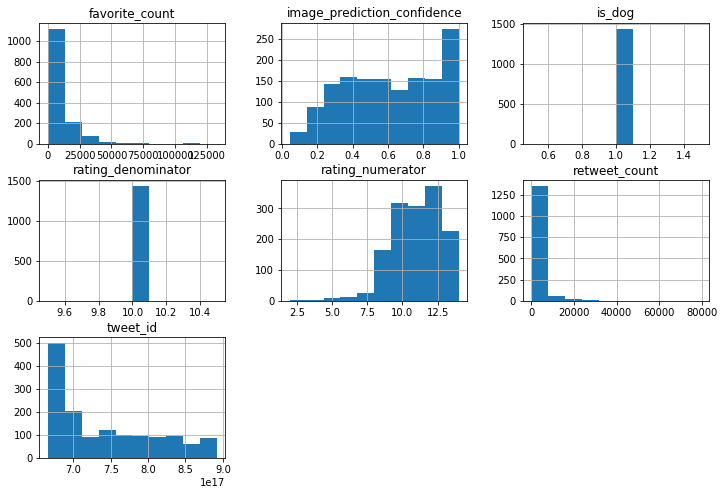

In [84]:
# Examining the distribution spread of all numerical columns
df.hist(figsize = (12,8));

This chart shows the distribution spread on all numerical columns 

### Visualization

#####  How optimized is the image recognition algorithm model?

In [85]:
# Sort all images with respect to confidence level
bins = [0,0.2,0.5,0.7,0.9,1.0]
labels = ['Very-low confidence', 'Low confidence','Medium confidence','High confidence','Exact match']

conf_level = pd.cut(df['image_prediction_confidence'],bins = bins, labels = labels, right = False)
conf_level

conf_level = conf_level.value_counts()
conf_level

Low confidence         443
High confidence        325
Medium confidence      308
Exact match            282
Very-low confidence     83
Name: image_prediction_confidence, dtype: int64

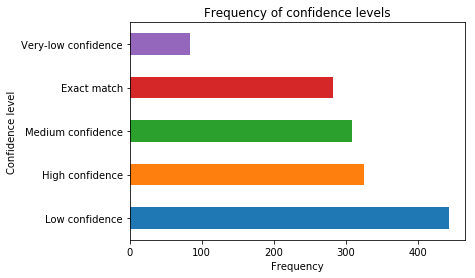

In [86]:
conf_level.plot(kind = 'barh');
plt.xlabel("Frequency")
plt.ylabel("Confidence level")
plt.title("Frequency of confidence levels");

This chart shows that majority of the images identified by the CNN algorithm have low confidence interval values

##### Which dog name(s) is the most popular?


In [87]:
# Select 10 most popular dog names
Pop_dogname = df.dog_name.value_counts().head(10)
Pop_dogname

 Charlie    10
 Cooper     10
 Oliver      9
 Tucker      8
 Lucy        8
 Sadie       7
 Penny       7
 Daisy       7
 Koda        6
 Jax         6
Name: dog_name, dtype: int64

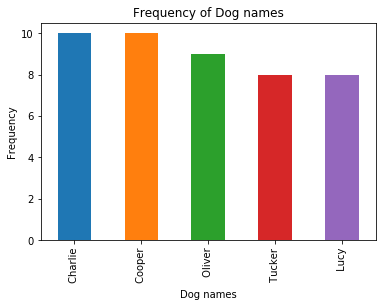

In [88]:
# Create a function to identify and visualize a popular attribute
column = df.dog_name
def PopularVis(column):
    Pop = column.value_counts().head()
    Pop.plot(kind= 'bar')
    plt.show();
    
plt.xlabel("Dog names")
plt.ylabel("Frequency")
plt.title("Frequency of Dog names");
    

PopularVis(column)

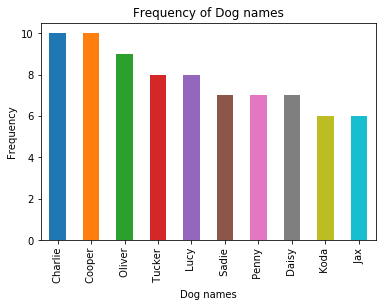

In [89]:
# Create visualization
Pop_dogname.plot(kind= 'bar')
plt.xlabel("Dog names")
plt.ylabel("Frequency")
plt.title("Frequency of Dog names");

The above above visualization indicates that the names 'Cooper' and 'Charlie' are the most popular dog names in the dataset

##### Which dog name(s) is the least popular?

In [90]:
# Select the dog names that appeared once throughout the dataset

Least_dogname = df.query('dog_name == dog_name')
Least_dogname = Least_dogname.groupby('dog_name').count()[['is_dog']]
Least_dogname.rename(columns ={ 'is_dog' : 'count'}, inplace = True)
Least_dogname = Least_dogname.query('count <= 1')
Least_dogname

,count
dog_name,
Ace,1
Acro,1
Adele,1
Aiden,1
Aja,1
Akumi,1
Albert,1
Aldrick,1
Alejandro,1


In [91]:
# Count the less popular dog names
Least_dogname.sum()

count    596
dtype: int64

##### Which dog breed is the most popular?

In [92]:
# Select the most popular dog breeds
df['dog_breed'].value_counts().head(5)

golden_retriever      130
labrador_retriever     91
pembroke               88
chihuahua              78
pug                    54
Name: dog_breed, dtype: int64

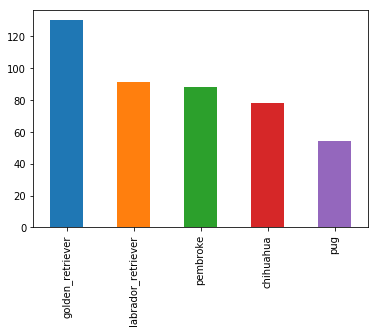

In [93]:
column = df['dog_breed']
PopularVis(column)

This chart shows that the golden retriever is the most popular breed of dog in the data gathered

##### Which dog breed has the highest and lowest average ratings?

In [94]:
dog_ratingslow = df.groupby('dog_breed').rating_numerator.mean().sort_values().head(5)
dog_ratingslow

dog_breed
japanese_spaniel               5.00
soft-coated_wheaten_terrier    8.25
welsh_springer_spaniel         9.00
walker_hound                   9.00
scotch_terrier                 9.00
Name: rating_numerator, dtype: float64

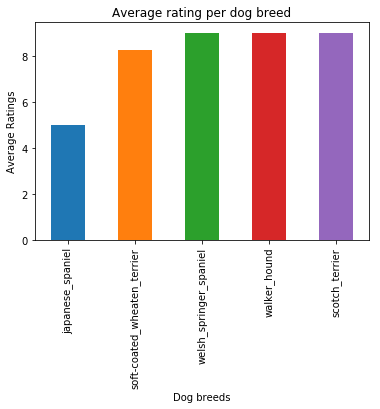

In [95]:
dog_ratingslow.plot(kind = 'bar')
plt.xlabel("Dog breeds")
plt.ylabel("Average Ratings")
plt.title("Average rating per dog breed");

This charts reveals that Japanese spaniel has the lowest average ratings

In [96]:
dog_ratingshigh = df.groupby('dog_breed').rating_numerator.mean().sort_values().tail(5)
dog_ratingshigh

dog_breed
silky_terrier      12.000000
border_terrier     12.142857
tibetan_mastiff    12.250000
briard             12.333333
saluki             12.500000
Name: rating_numerator, dtype: float64

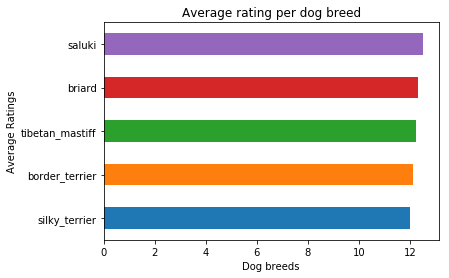

In [97]:
dog_ratingshigh.plot(kind = 'barh')
plt.xlabel("Dog breeds")
plt.ylabel("Average Ratings")
plt.title("Average rating per dog breed");

The Saluki breed has the highest average rating according to the chart above

##### Which dog stage has the highest average favorite and retweet count?

In [98]:
df.groupby('dog_stage').retweet_count.mean().sort_values()

dog_stage
pupper     2557.027778
floofer    4968.714286
puppo      6551.473684
doggo      7594.854167
Name: retweet_count, dtype: float64

In [99]:
df.groupby('dog_stage').favorite_count.mean().sort_values()

dog_stage
pupper      8048.430556
floofer    13206.000000
doggo      20556.354167
puppo      22308.210526
Name: favorite_count, dtype: float64

The 'doggo' dog stage has a higher average retweet count than every other stage while 'puppo' dominate the average favorite count category.

##### Which dog stage is largely dominant in the dataset?

In [100]:
df['dog_stage'].value_counts()

pupper     144
doggo       48
puppo       19
floofer      7
Name: dog_stage, dtype: int64

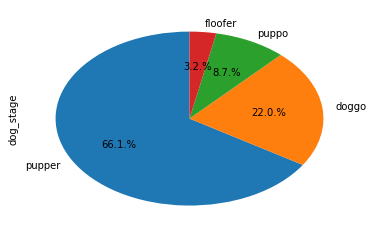

In [101]:
df['dog_stage'].value_counts().plot(kind = 'pie', autopct = '%1.1f.%%', startangle = 90);

The pupper stage largely dominate the dataset based on the chart above

##### Which dog breed has the highest average favorite and retweet count?

In [102]:
df.groupby('dog_breed').retweet_count.mean().sort_values().head(10)

dog_breed
curly-coated_retriever         270.500000
brabancon_griffon              287.666667
groenendael                    413.000000
ibizan_hound                   431.000000
japanese_spaniel               471.000000
welsh_springer_spaniel         517.000000
tibetan_terrier                557.750000
entlebucher                    706.000000
soft-coated_wheaten_terrier    736.250000
scottish_deerhound             764.333333
Name: retweet_count, dtype: float64

In [103]:
df.groupby('dog_breed').favorite_count.mean().sort_values().head(10)

dog_breed
brabancon_griffon               885.000000
curly-coated_retriever          967.500000
ibizan_hound                   1114.666667
japanese_spaniel               1362.000000
tibetan_terrier                1841.000000
groenendael                    1896.000000
soft-coated_wheaten_terrier    2040.625000
standard_schnauzer             2046.000000
scottish_deerhound             2485.666667
lhasa                          2659.800000
Name: favorite_count, dtype: float64

The 'standard poodle' dog breed has a higher average retweet count than every other stage while 'saluki' breed dominates the average favorite count category.

### Insights:
1. The image recognition model requires more optimization for effective and more efficient recognition.

2. More people name their dogs Charlie and Cooper.

3. The Golden retriever is the most popular dog bree.

4. The Saluki breed is very preferred as it has the highest average rating and favorite count.

5. Other well preferred breeds that dominate both the top 10 favorite and retweet counts include french bull dog, afghan hound, standard poodle, giant schnauzer, and engish springer

6. Some of the least preferred species are brabancon griffon, curly-coated retriever, ibizan hound, japanese spaniel and groenedael

7. The pupper dog stage dominated the entire dataset.

8. the puppo and doggo are the most preferred dog stages among the dogs.

9. Presence of very large values in  retweet count and favorite count columns